In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=  pd.read_csv('Cleaned_Women_ECommerce.csv')

In [3]:
df.head()

,Unnamed: 0,clothing_id,age,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,new_text,clean_text,review_length,rating_class,tokens
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,45,good,"['absolutely', 'wonderful', 'silky', 'sexy', '..."
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store...,195,good,"['love', 'dress', 'sooo', 'pretty', 'happened'..."
2,2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,major design flaw high hope dress really wante...,338,neutral,"['major', 'design', 'flaw', 'high', 'hope', 'd..."
3,3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",favorite buy love love love jumpsuit fun ...,110,good,"['favorite', 'buy', 'love', 'love', 'love', 'j..."
4,4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,flattering shirt shirt flattering due adjustab...,132,good,"['flattering', 'shirt', 'shirt', 'flattering',..."


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

## Empirical Cumulative Distribution Function(ECDF)

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    
    # Number of data points: n
    n= len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)
    
    return x, y

## Customer Ratings ECDF Plot

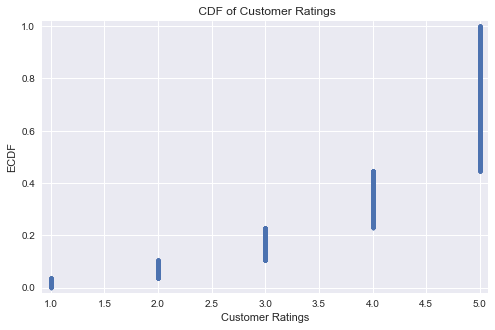

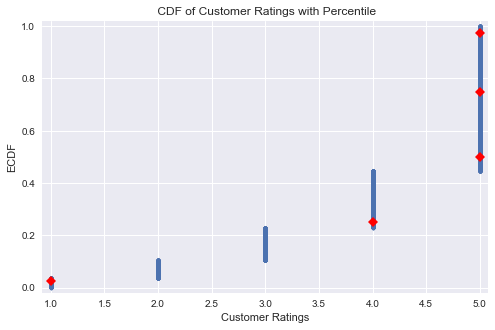

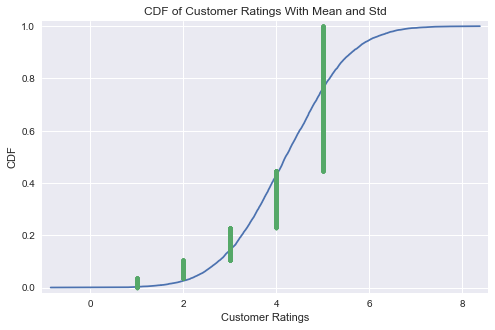

In [6]:
sns.set()
temp_np_array = np.array(df.rating)

# Compute ECDF for versicolor data: x_vers, y_vers
x_temp, y_temp = ecdf(temp_np_array)
plt.figure(figsize = (8,5))
# Generate plot
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Customer Ratings')
_ = plt.ylabel('ECDF')
_ = plt.title(' CDF of Customer Ratings')
# Display the plot
plt.show()

# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_temp = np.percentile(temp_np_array, percentiles)

# Print the result
#print (ptiles_temp)

x_temp, y_temp = ecdf(temp_np_array)
plt.figure(figsize = (8,5))

# Generate plot
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Customer Ratings')
_ = plt.ylabel('ECDF')
_ = plt.title(' CDF of Customer Ratings with Percentile')
# Display the plot

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_temp, percentiles/100, marker='D', color='red', linestyle='none')

plt.show()

# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp_np_array)
sigma = np.std(temp_np_array)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(temp_np_array)
# Plot the CDFs and show the plot
plt.figure(figsize = (8,5))
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Customer Ratings')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Customer Ratings With Mean and Std')

** There appears that Ratings are not normally distributed, Rating 5 is overwhelming the other Ratings.The 25 percentile is on Rating 4 and the rests was cumulated on rating 5 which shows that Rating consists of more than %50 Rating 5. Rating 4 and Rating 5 are more than %75 of the all ratings.**

## Bootstrap Replicate Function

In [7]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))   
## Create a function to draw the boot-strap samples
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
            bs_replicates[i] = bootstrap_replicate_1d(data, func)            
    return bs_replicates

## Average Customer Rating Distribution Plot

C:\Users\Mike\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Average Customer Ratings')

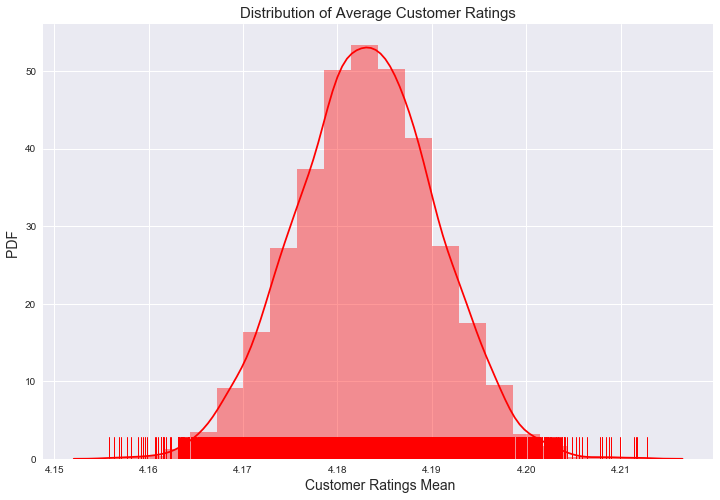

In [8]:
## Central Limit Theorem2
temp_np_array = np.array(df.rating)
bs_replicates  = draw_bs_reps(temp_np_array, np.mean, 10000)
plt.figure(figsize=(12,8))
sns.distplot(bs_replicates, rug='True', bins=20, color = 'red')
plt.xlabel(" Customer Ratings Mean", fontsize=14)
plt.ylabel('PDF ', fontsize=14)
plt.title("Distribution of Average Customer Ratings", fontsize=15)

**There appears that despite Rating 4 and 5 are overwhelming the other Ratings, Average of the Ratings are normally distributed. And the average rating is around 4.183** 

## Customer Ages ECDF Plot

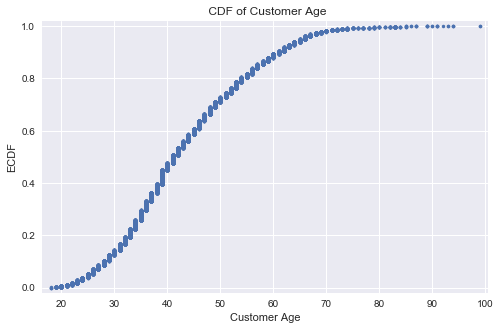

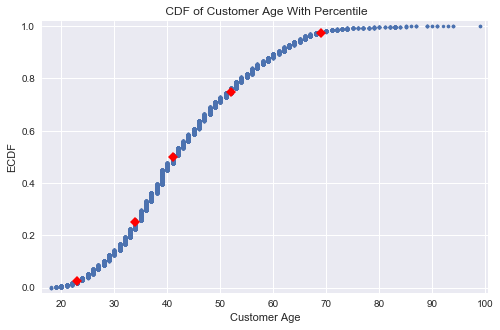

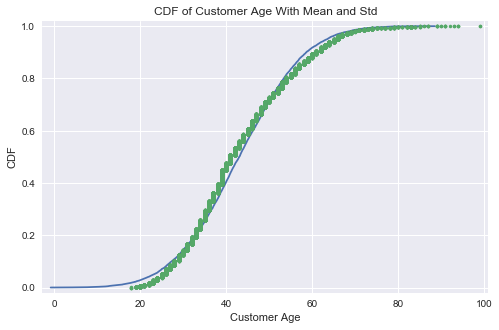

In [9]:
sns.set()
temp_np_array = np.array(df.age)

# Compute ECDF for versicolor data: x_vers, y_vers
x_temp, y_temp = ecdf(temp_np_array)
plt.figure(figsize = (8,5))
# Generate plot
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Customer Age')
_ = plt.ylabel('ECDF')
_ = plt.title(' CDF of Customer Age')
# Display the plot
plt.show()

# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_temp = np.percentile(temp_np_array, percentiles)

# Print the result
#print (ptiles_temp)

x_temp, y_temp = ecdf(temp_np_array)
plt.figure(figsize = (8,5))

# Generate plot
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Customer Age')
_ = plt.ylabel('ECDF')
_ = plt.title(' CDF of Customer Age With Percentile')
# Display the plot

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_temp, percentiles/100, marker='D', color='red', linestyle='none')

plt.show()

# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp_np_array)
sigma = np.std(temp_np_array)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(temp_np_array)
# Plot the CDFs and show the plot
plt.figure(figsize = (8,5))
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Customer Age')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Customer Age With Mean and Std')

**There appears that Customer Ages are normally distributed.Minimum age is around 20 and average age is around 43. There are some outliers after Age 69 as seen on the percentile plot. Std increases between Age 35 to 50.**

## Average Customer Age Distribution Plot

C:\Users\Mike\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Customer Age Mean')

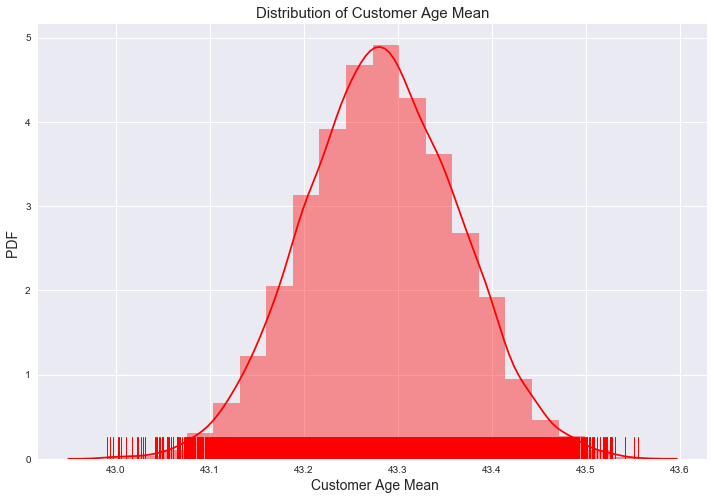

In [10]:
# Central Limit Theorem
temp_np_array = np.array(df.age)
bs_replicates  = draw_bs_reps(temp_np_array, np.mean, 10000)
plt.figure(figsize=(12,8))
sns.distplot(bs_replicates, rug='True', bins=20, color = 'red')
plt.xlabel(" Customer Age Mean", fontsize=14)
plt.ylabel('PDF ', fontsize=14)
plt.title("Distribution of Customer Age Mean", fontsize=15)

** There appears that Average of Customer Ages are normally distributed.The average Customer Age is around 43.3**

## Review Length ECDF Plot

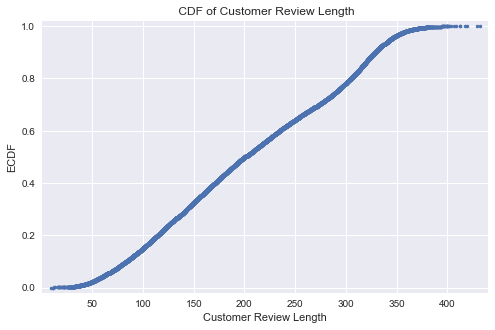

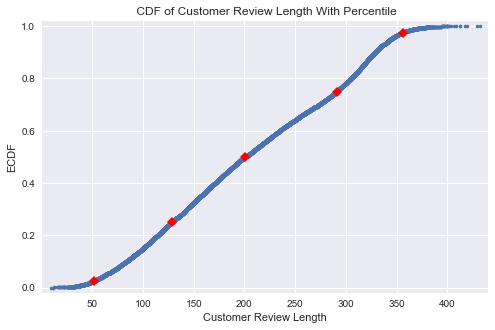

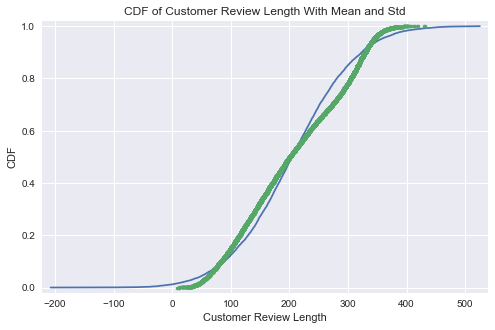

In [11]:
sns.set()
temp_np_array = np.array(df.review_length)

# Compute ECDF for versicolor data: x_vers, y_vers
x_temp, y_temp = ecdf(temp_np_array)
plt.figure(figsize = (8,5))
# Generate plot
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Customer Review Length')
_ = plt.ylabel('ECDF')
_ = plt.title(' CDF of Customer Review Length')
# Display the plot
plt.show()

# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_temp = np.percentile(temp_np_array, percentiles)

# Print the result
#print (ptiles_temp)

x_temp, y_temp = ecdf(temp_np_array)
plt.figure(figsize = (8,5))

# Generate plot
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Customer Review Length')
_ = plt.ylabel('ECDF')
_ = plt.title(' CDF of Customer Review Length With Percentile')
# Display the plot

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_temp, percentiles/100, marker='D', color='red', linestyle='none')

plt.show()

# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp_np_array)
sigma = np.std(temp_np_array)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(temp_np_array)
# Plot the CDFs and show the plot
plt.figure(figsize = (8,5))
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Customer Review Length')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Customer Review Length With Mean and Std')

** All review length normally between 50 and 355 characters. But there are some outliers after 350 sharacters and less than 50 characters. Median length of the reviews is around 200 characters. On the average and std plot, there appears that from 100 and 200, and from 220 to 330, std increases.**

## Average Customer Review Length Distribution Plot

C:\Users\Mike\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Customer Review Length Mean')

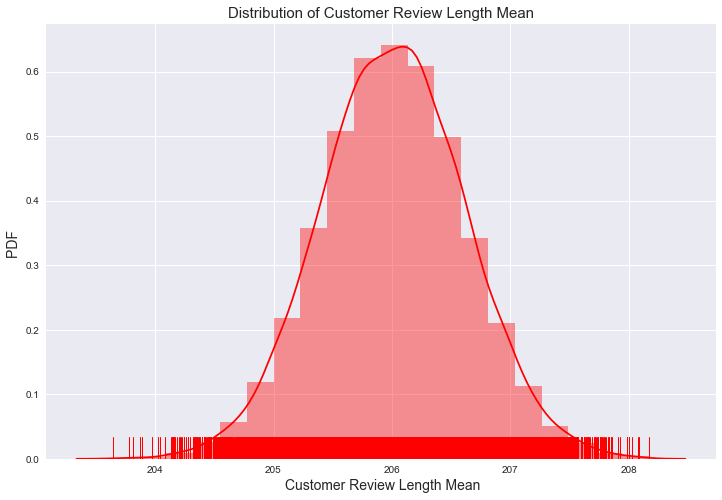

In [12]:
#Central Limit Theorem 
temp_np_array = np.array(df.review_length)
bs_replicates  = draw_bs_reps(temp_np_array, np.mean, 10000)
plt.figure(figsize=(12,8))
sns.distplot(bs_replicates, rug='True', bins=20, color = 'red')
plt.xlabel(" Customer Review Length Mean", fontsize=14)
plt.ylabel('PDF ', fontsize=14)
plt.title("Distribution of Customer Review Length Mean", fontsize=15)

** There appears that Average of Customer Ages are normally distributed. The average review length is around 206 characters**

## Hypothesis-1

### Null Hypothesis is: The true mean of the Rating is 4.18. Alternative hypothesis is that the true mean of Rating differs from 4.18.

In [13]:
# Compute the confidence interval
conf_int = np.percentile(bs_replicates,[2.5, 97.5])
# Print the confidence interval
print('95% confidence interval =', conf_int)

95% confidence interval = [ 204.81696018  207.21527201]


In [14]:
# Compute fraction of replicates that are greater (p-value)
age_mean  = df.rating.mean()
print ('The mean of ages in the data set is {}'.format(age_mean))
p = np.sum(bs_replicates >= age_mean) / len(bs_replicates)
print ('p-value', p)

The mean of ages in the data set is 4.183091744741029
p-value 1.0


**Since p-value is bigger than 0.05 we can not reject null hypothesis, since there is not enough evidence that the true mean of the Rating differs from 4.18.**

## Hypothesis-2

### Null Hypothesis is: There is no significant difference between Good and Neutral Rating in average(mean) Costumor Age. We apply 2_sample test.

In [15]:
rating_g = df[df['rating_class'] == 'good']['age']
rating_n = df[df['rating_class'] == 'neutral']['age']

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# Compute difference of mean temperature: empirical_diff_means
empirical_diff_means = diff_of_means(rating_g, rating_n)

# Concatenate data sets: concat_temp
concat_rgn = np.concatenate((rating_g, rating_n))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(concat_rgn, size=len(concat_rgn))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(rating_g)], bs_sample[len(rating_g):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / float(len(bs_replicates))
print ('p-value: {}'.format(p))

p-value: 0.0


**Since p-value is 0.0, we should reject null hypothesis which means that there is significant difference between Good Rating and Neutral Rating in average of Customer Age.**

## Hypothesis-3

### Null Hypothesis is: There is no significant difference between Good and Neutral Rating in average(mean) review length. We apply 2_sample test.¶

In [16]:
rating_g = df[df['rating_class'] == 'good']['review_length']
rating_n = df[df['rating_class'] == 'neutral']['review_length']

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# Compute difference of mean temperature: empirical_diff_means
empirical_diff_means = diff_of_means(rating_g, rating_n)

# Concatenate data sets: concat_temp
concat_rgn = np.concatenate((rating_g, rating_n))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(concat_rgn, size=len(concat_rgn))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(rating_g)], bs_sample[len(rating_g):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / float(len(bs_replicates))
print ('p-value: {}'.format(p))

p-value: 1.0


In [17]:
# Check empirical and hypothetical frequences 
print('The empirical mean is: ', empirical_diff_means)
print('The theoretical mean is: ', np.mean(bs_replicates))
print('The theoretical standard deviation is: ', np.std(bs_replicates))

The empirical mean is:  -10.463694603334602
The theoretical mean is:  0.000315377155633
The theoretical standard deviation is:  1.8609647019


**Since p-value is bigger than 0.05, we can not reject null hypothesis since there is not enough evidence that there is significant difference between good and neutral rating in average review length.**